In [82]:
# @title IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
plt.figure(figsize=(10,5))
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

<Figure size 1000x500 with 0 Axes>

In [35]:
# @title LOADING DATASET
df=pd.read_csv('/content/car data.csv')

In [36]:
# @title UNDERSTANDING OUR DATASET
df.sample(10)    #checking dataset

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
274,brio,2014,5.30,6.80,16500,Petrol,Dealer,Manual,0
117,Royal Enfield Thunder 500,2015,1.10,1.90,14000,Petrol,Individual,Manual,0
208,i20,2017,7.90,8.10,3435,Petrol,Dealer,Manual,0
193,Hero Ignitor Disc,2013,0.20,0.65,24000,Petrol,Individual,Manual,1
223,verna,2015,8.25,9.40,61381,Diesel,Dealer,Manual,0
48,ertiga,2015,5.80,7.71,25870,Petrol,Dealer,Manual,0
74,etios cross,2014,4.90,8.93,83000,Diesel,Dealer,Manual,0
54,innova,2005,2.75,10.21,90000,Petrol,Individual,Manual,0
287,amaze,2015,5.75,7.50,44000,Petrol,Dealer,Automatic,0
56,etios cross,2015,4.50,7.27,40534,Petrol,Dealer,Manual,0


In [37]:
# checking number of rows and columns
df.shape  # we have 301 rows and 9 columns

(301, 9)

In [38]:
# checking data types in dataset and  checking data null values
df.info()  # we have no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [39]:
df.isnull().sum()   #no null values

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [40]:
# performing basic statistic on numerical columns
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [41]:
df.describe(include='object')

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [42]:
# checking unique values in fuel columns
df.Fuel_Type.value_counts() # we have 3 unique values.

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [43]:
df.Selling_type.value_counts() # we have 2 unique values- 1) dealer 2) individual

,count
Selling_type,
Dealer,195
Individual,106


In [44]:
df.Transmission.unique()   # we have 2 unique values- 1) manual 2) automatic

array(['Manual', 'Automatic'], dtype=object)

In [45]:
df.sample(10) #checking changed data.

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
199,Honda CB Shine,2007,0.12,0.58,53000,Petrol,Individual,Manual,0
211,elantra,2015,11.75,14.79,43535,Diesel,Dealer,Manual,0
132,Bajaj Avenger 220,2017,0.75,0.95,3500,Petrol,Individual,Manual,0
168,Honda CB Trigger,2013,0.42,0.73,12000,Petrol,Individual,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
201,i20,2010,3.25,6.79,58000,Diesel,Dealer,Manual,1
218,verna,2014,6.45,8.40,45078,Petrol,Dealer,Manual,0
155,Honda Activa 4G,2017,0.48,0.51,4300,Petrol,Individual,Automatic,0
200,Bajaj Pulsar 150,2006,0.10,0.75,92233,Petrol,Individual,Manual,0


Text(0.5, 1.0, 'count of cars according to fuel type')

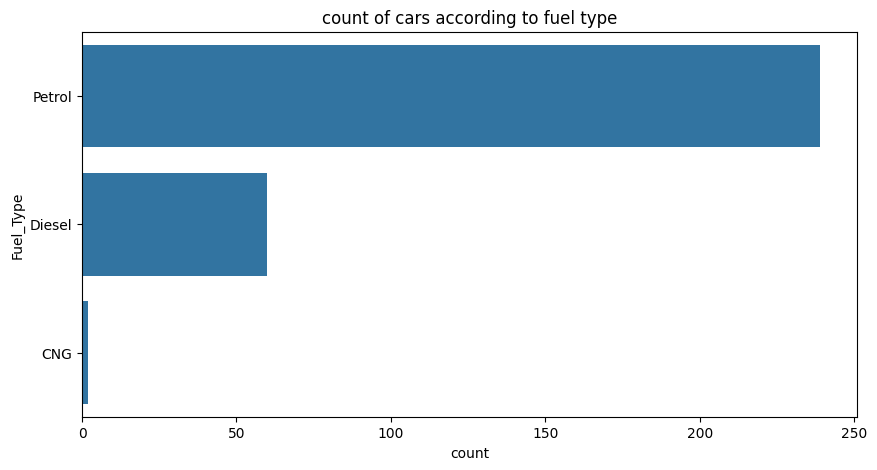

In [72]:
# @title DATA VISUALIZATION
plt.figure(figsize=(10,5))
sns.countplot(df.Fuel_Type)
plt.title('count of cars according to fuel type')


<Axes: >

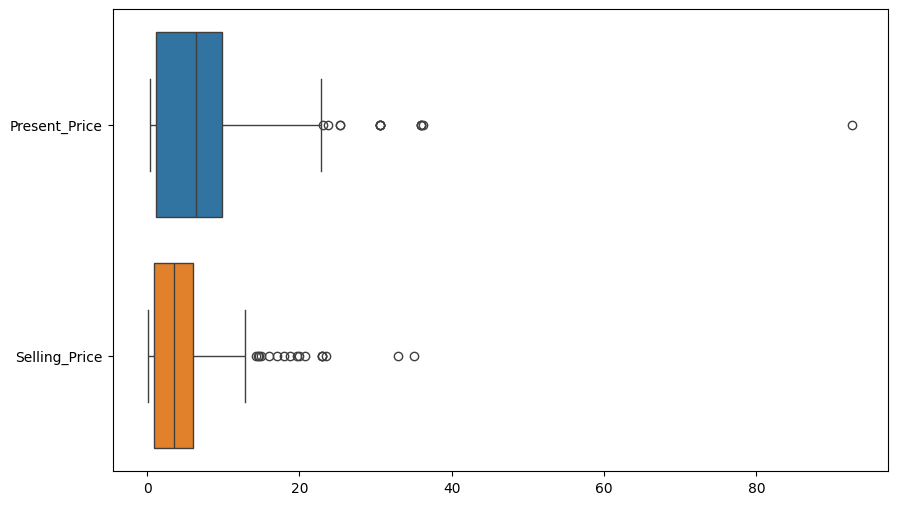

In [61]:
#checking outliers using boxplot
plt.figure(figsize=(10,6))
sns.boxplot((df['Present_Price'],df['Selling_Price']), orient='h')
#outliers are present in present price which will create biases.


Text(0.5, 1.0, 'outliers in kms driven')

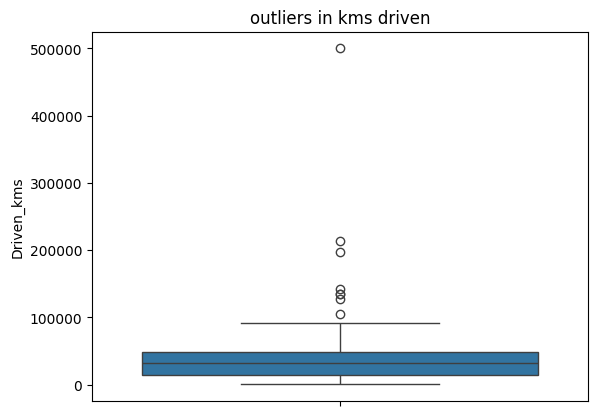

In [71]:
sns.boxplot(df.Driven_kms)
plt.title('outliers in kms driven')  # outliers are present

Text(0.5, 1.0, ' count of manual and automatic cars')

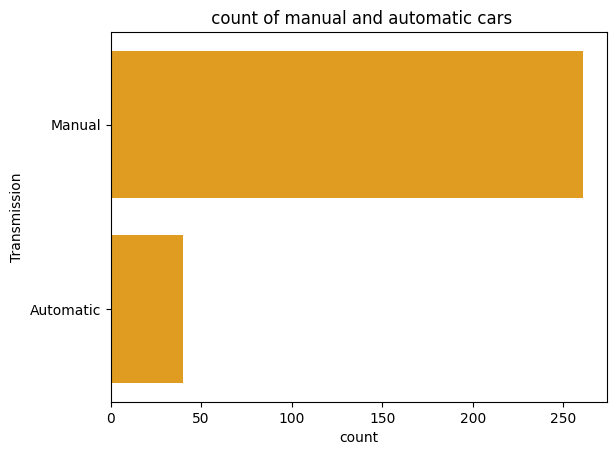

In [70]:
sns.countplot(df.Transmission,color='orange')
plt.title(' count of manual and automatic cars')

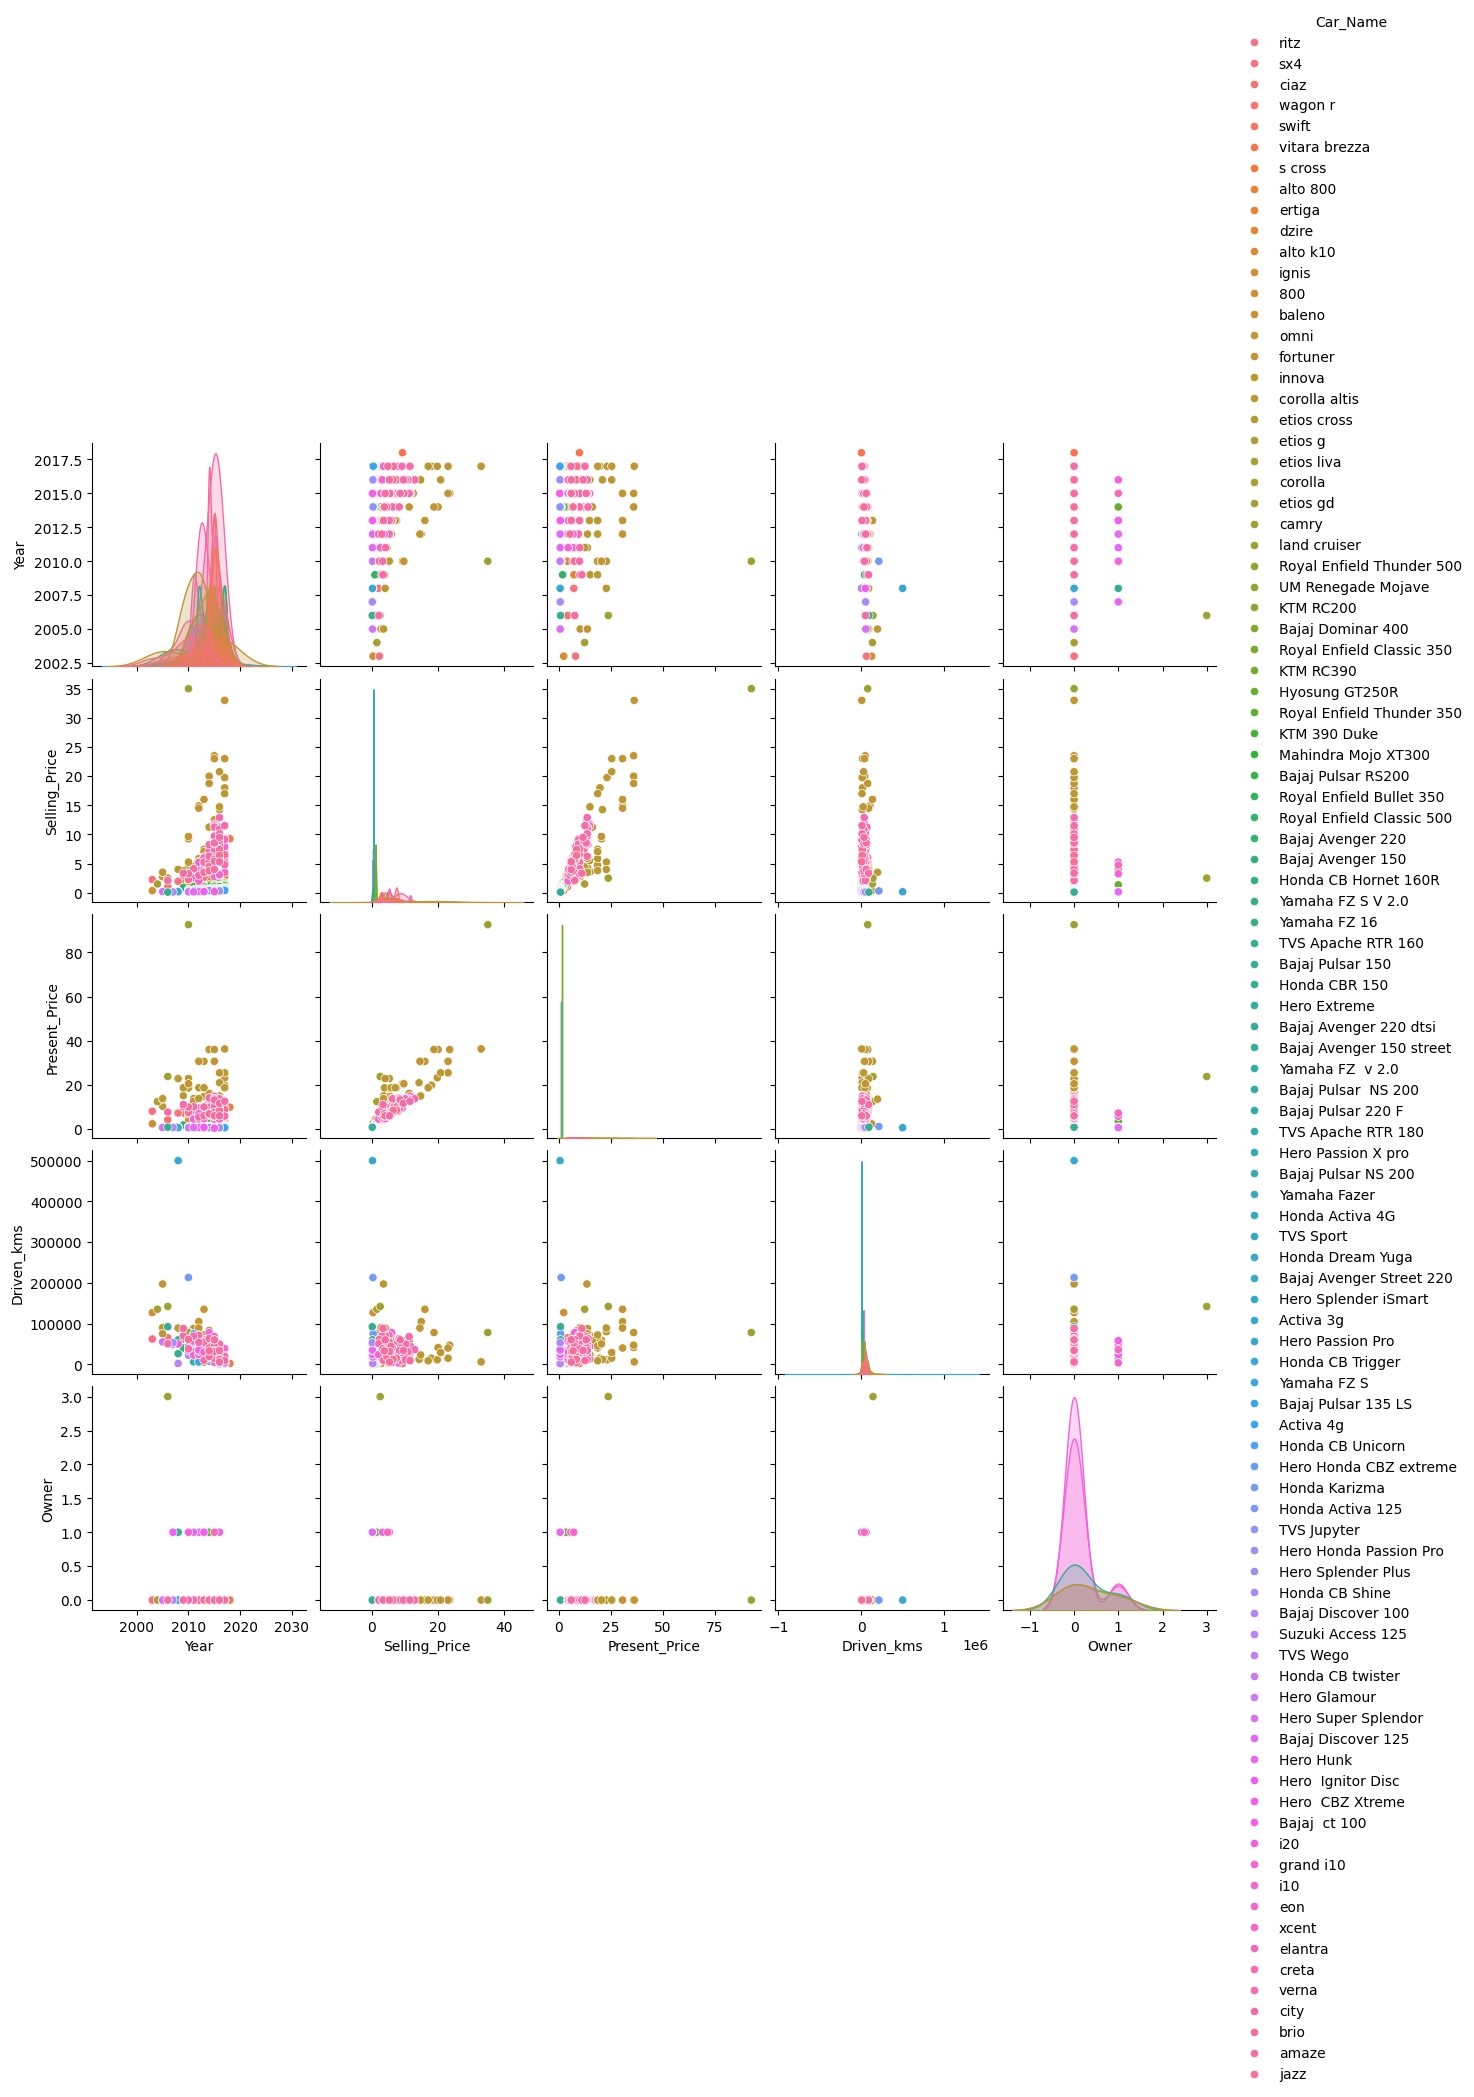

In [73]:
sns.pairplot(df , hue='Car_Name')

In [74]:
# converting categorical columns to numeical columns
le=LabelEncoder()
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Selling_type']=le.fit_transform(df['Selling_type'])
df['Transmission']=le.fit_transform(df['Transmission'])

In [75]:
df.sample(5)  #sucessfully converted categorical column to  umerical columns using label encoding

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
43,dzire,2014,5.50,8.06,45780,1,0,1,0
250,creta,2016,12.90,13.60,35934,1,0,1,0
172,Bajaj Pulsar 135 LS,2014,0.40,0.64,13700,2,1,1,0
220,eon,2017,3.50,5.43,38488,2,0,1,0
217,eon,2016,3.15,4.43,15000,2,0,1,0


In [76]:
# @title MODEL BUILDING USING LINEAR ALGORITHM
#spliting data into x and y
x=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']


In [77]:
#splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [78]:
#applying standard scaler to scale value on equal range
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [79]:
#building model
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [80]:
#predicting x test
y_pred=linear_model.predict(x_test)

In [83]:
# @title ACCURACY
accuracy=r2_score(y_test,y_pred)
accuracy

0.8400090703080454

In [85]:
mean_squared_error(y_test,y_pred)   # MSE IN RANGE OF 1-10 is good model but we can improve it.

3.6854845833988343

In [92]:
# @title APPLYING ANOTHER MODEL TO INCREASE ACCURACY USING RANDOMFOREST REGRESSOR
#APPLYING RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
param_grid={  # passing parameter to get best parameter
    'n_estimators':[100,200,300],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]

}
rf=RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [93]:
best_param=grid_search.best_params_  #getting best parameters
best_param

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [105]:
best_rf_regressor = RandomForestRegressor(n_estimators=100,max_depth=None,min_samples_leaf=1,min_samples_split=2) #using best parameter to build model
best_rf_regressor.fit(x_train, y_train)

RandomForestRegressor()

In [106]:
y_pred_test=best_rf_regressor.predict(x_test)  #predicting y_test

In [107]:
# @title * NEW ACCURACY *
r2_score(y_test,y_pred_test)  #improved accuracy

0.9036994206878319

In [108]:
mean_squared_error(y_test,y_pred_test) #mse score

2.2183401340983626